In [1]:
!pip install pandas
!pip install matplotlib

  Using cached matplotlib-3.9.4-cp39-cp39-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp39-cp39-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.57.0-cp39-cp39-macosx_10_9_universal2.whl.metadata (102 kB)
  Using cached kiwisolver-1.4.7-cp39-cp39-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
Using cached matplotlib-3.9.4-cp39-cp39-macosx_11_0_arm64.whl (7.8 MB)
Using cached contourpy-1.3.0-cp39-cp39-macosx_11_0_arm64.whl (249 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.57.0-cp39-cp39-macosx_10_9_universal2.whl (2.8 MB)
Using cached importlib_resources-6.5.2-py3-none-any.whl (37 kB)
Using cached kiwisolver-1.4.7-cp39-cp39-macosx_11_0_arm64.whl (64 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 15.3 MB/s eta 0:00:00a 0:00:01


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('filtered_journeys.csv')

/var/folders/dr/45vjyg1x2wxcdlvfvjww69jc0000gn/T/ipykernel_6012/3192370209.py:1: DtypeWarning: Columns (10,11,20,28,30,32,92,94,100,109,111,136,145,161) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('filtered_journeys.csv')


In [4]:
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 
df.columns

Index(['event', 'from_date', 'properties_$ae_first_app_open_date',
       'properties_$ae_session_length', 'properties_$ae_updated_version',
       'properties_$app_build_number', 'properties_$app_version_string',
       'properties_$carrier', 'properties_$city', 'properties_$device_id',
       ...
       'properties_viglinkAPIResponse_optimized',
       'properties_viglinkAPIResponse_url', 'properties_webviewMessage',
       'properties_wifi', 'to_date', 'time_diff', 'new_journey', 'journey_id',
       'user_journey', 'url_domain'],
      dtype='object', length=176)

In [5]:
df['event'].unique()

array(['web_navigation', 'cart', 'purchase', 'tpew_retailer_cached',
       'purchase_revisited'], dtype=object)

In [6]:
pd.set_option('display.max_rows', None) 
result = df.groupby('event').size().reset_index(name='count')
sorted_result = result.sort_values(by='count', ascending=False)
sorted_result

,event,count
4,web_navigation,386384
0,cart,18573
3,tpew_retailer_cached,8283
1,purchase,971
2,purchase_revisited,352


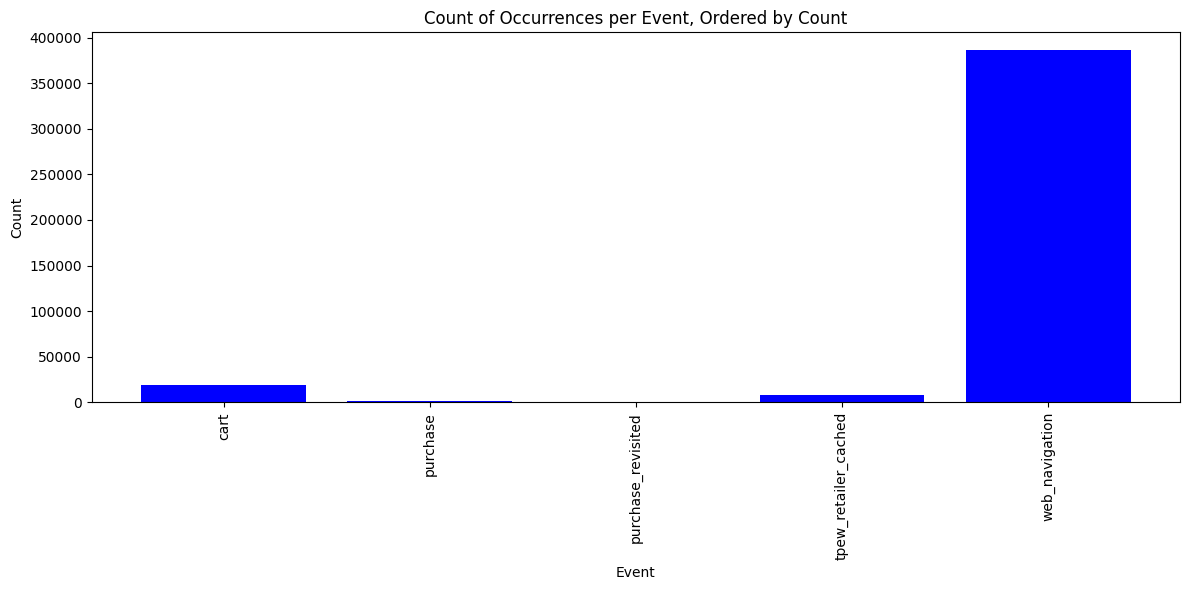

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.bar(result['event'], result['count'], color='blue')

# Adding titles and labels
plt.title('Count of Occurrences per Event, Ordered by Count')
plt.xlabel('Event')
plt.ylabel('Count')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [9]:
df.shape[0]

414563

In [10]:
# find all device ids where experiment started
exp_started=df[df['event']=='$experiment_started']
print(f"Rows with experiment started: {exp_started.shape[0]}")

Rows with experiment started: 0


In [31]:
exp_device_id = exp_started['properties_$device_id'].unique()
exp_device_id.shape[0]

9587

In [11]:
exp_device_id = df['properties_$device_id'].unique()
exp_device_id.shape[0]

3767

In [12]:
for device_id in exp_device_id:
    matching_rows = df[df['properties_$device_id'] == device_id]
    filename=f"filtered_journeys/users/{device_id}.txt"
    matching_rows.to_csv(filename, index=False)
    print(f"Written {len(matching_rows)} rows to {filename}")

Written 11 rows to filtered_journeys/users/E2714189-4709-4E05-854C-F9EF603CF703.txt
Written 88 rows to filtered_journeys/users/2B4ED3F0-F385-45D1-8053-A2FC46A1B856.txt
Written 9 rows to filtered_journeys/users/0B4E305E-4035-4807-9A6C-0A9D59A12ABF.txt
Written 1 rows to filtered_journeys/users/5620630B-D2ED-41AD-90EC-9786062F0930.txt
Written 415 rows to filtered_journeys/users/ADFF5904-F6DC-4EB4-A8A2-7E3F98F22472.txt
Written 19 rows to filtered_journeys/users/6996870A-303A-4E1B-8CDD-6E9BDA2F719A.txt
Written 7 rows to filtered_journeys/users/7936D0F5-2D3B-4966-9E51-BE816367A1EF.txt
Written 4 rows to filtered_journeys/users/10DD0AE2-97DD-4F22-895F-DA337F8F9727.txt
Written 9 rows to filtered_journeys/users/E1A3C909-8A4B-49AF-B456-0D8031AB5EED.txt
Written 1 rows to filtered_journeys/users/7AF8FB81-EAF7-4FC8-8BE3-4BF925F97703.txt
Written 69 rows to filtered_journeys/users/ADC7A719-8993-41D6-9211-BC0F252A1F97.txt
Written 4 rows to filtered_journeys/users/10E5AB3D-E9EE-463B-88E7-25A995BE2858.tx